# Introduction
Forest fire is a critical concern over the world and with the increase in global warming it is futher increasing be it Amazon forest fire or Austrailian forest fire killing millions of inhabitants. Algeria is one of the countries affected by this phenomena, mainly in summer. Over 320409 hectares of forest are burned between 2008 and 2017 with over 31513 fires. So, forest fire detection becomes an important part to save these lives.

### Lifecycle of a machine learning project
>- Understanding the Problem statement
>- Data collection
>- Exploratory data analysis
>- Data cleaning
>- Data pre-processing
>- Model training 
>- Model selection


### Problem statement
>- The dataset is from two regions of Algerian forest. 
>- We have to deep dive into the data to get out with a conclusion regarding the cause of forest fire in both the regions.

### Import data and required libraries
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings library 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing data

In [142]:
data = pd.read_csv(r'C:\Users\Swastic\Desktop\INeuron\EDA\Algerian_forest fires\Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

#### Reading the first 6 rows

In [143]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Removing the rows as it has region's and feature's name which won't help while doing analysis

In [144]:
data[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


#### It can be seen from above data rows 122, 123 and 124 has to be dropped

In [145]:
data_updated = data.drop([122,123,124])

#### Checking for updated data

In [146]:
data_updated[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


#### Marking both the regions by including one more row, Bejaia region ends at index number 121 and Sidi-Bel Abbes region starts at index number 125

>- Numbering Bejaia region as 0 and Sidi-Bel Abbes regions as 1

In [147]:
data_updated

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [148]:
Bejaia_region = 0
Sidi_bel_Abbes_region = 1
data_updated.loc[0:122,'Region']= '0'
data_updated.loc[125:246,'Region']= '1'
data_updated

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


#### Shape of the dataset

In [132]:
data_updated.shape

(244, 15)

#### Summary of the dataset

In [149]:
data_updated.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,244,244
unique,31,4,1,19,62,18,39,173,166,198,106,173,126,8,2
top,1,7,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,132,122


#### Checking datatype in dataset

In [134]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 38.6+ KB


### Exploring Data

As all the features are object and non-null we get into exploration of the data.

#### Feature information:
>- day: day of the month
>- month: month of the year
>- year: year of the data
>- Temperature: Temperature in degree celcius
>- RH: relative humidity on that day and area %
>- Ws: Wind speed in Km/h: 6 to 29
>- FFMC: Fine fule moisture code which indicates the moisture in the fine fuels and it is an indicator of the ignition probability.
>- DMC: Duff moisture code is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an idea of fuel consumption in moderate duff layers and medium-size woody material.
>- DC: Drought code is a numeric rating of the average moisture content of deep, compact organic layers. This code is a useful indicator of seasonal drought effects on forest fuels and the amount of smoldering in deep duff layers and large logs.
>- ISI: Initial spread index, expected rate of fire spread.
>- BUI: Build up index, rating for total amount of fuel available for combustion.
>- FWI: Fire weather index, it integrates current ISI and BUI to produce a unitless index of general fire intensity potential.
>- Classes: whether there was fire or no fire
>- Region: Bejaia region as 0 and Sidi-Bel Abbes regions as 1

### Changing the datatypes of the features

In [154]:
data_updated.columns
features = ['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI','Region']
for fea in features:
    data_updated[fea] = data_updated[fea].astype(float)

data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(14), object(1)
memory usage: 38.6+ KB


### Analysis

#### Counting the number of fires in each region

<AxesSubplot:xlabel='Classes', ylabel='count'>

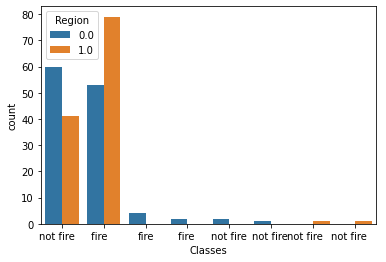

In [157]:
sns.countplot(data= data_updated, x = "Classes", hue = "Region")

#### Looks like some of the data has unnecessary spaces at the end

<AxesSubplot:xlabel='Classes', ylabel='count'>

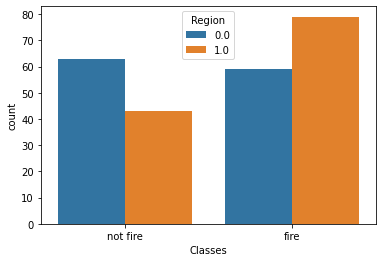

In [158]:
data_updated['Classes']= data_updated['Classes'].str.rstrip()
sns.countplot(data= data_updated, x = "Classes", hue = "Region")

##### Conclusion: We can see from above plot that Sidi-Bel Abbes had more forest fire

### Segregating discrete and continuous variable

#### Discrete variables

In [159]:
data_updated

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


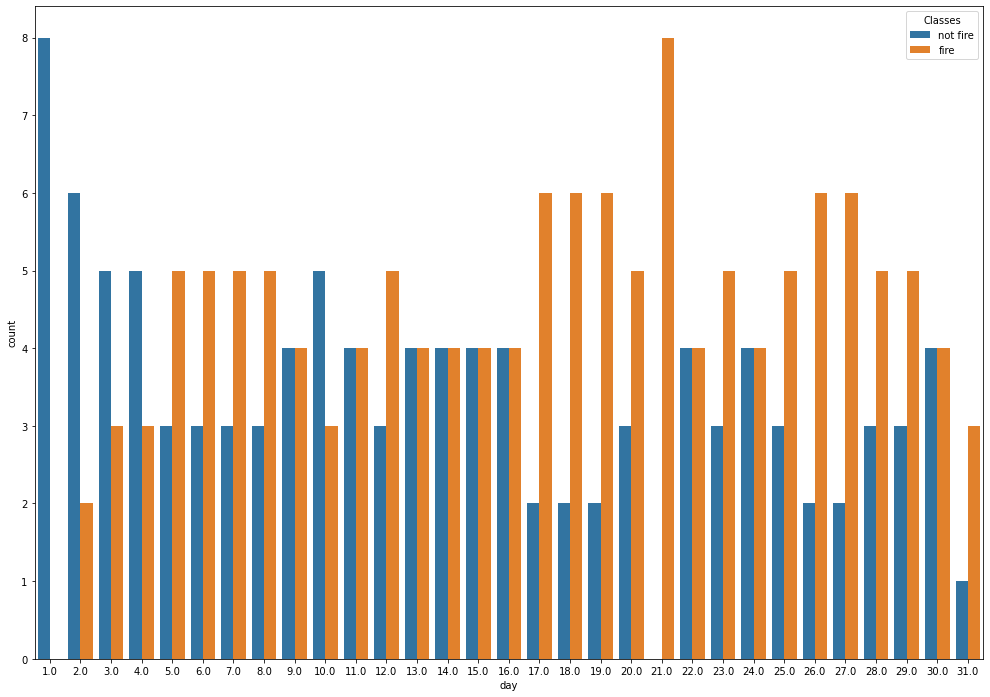

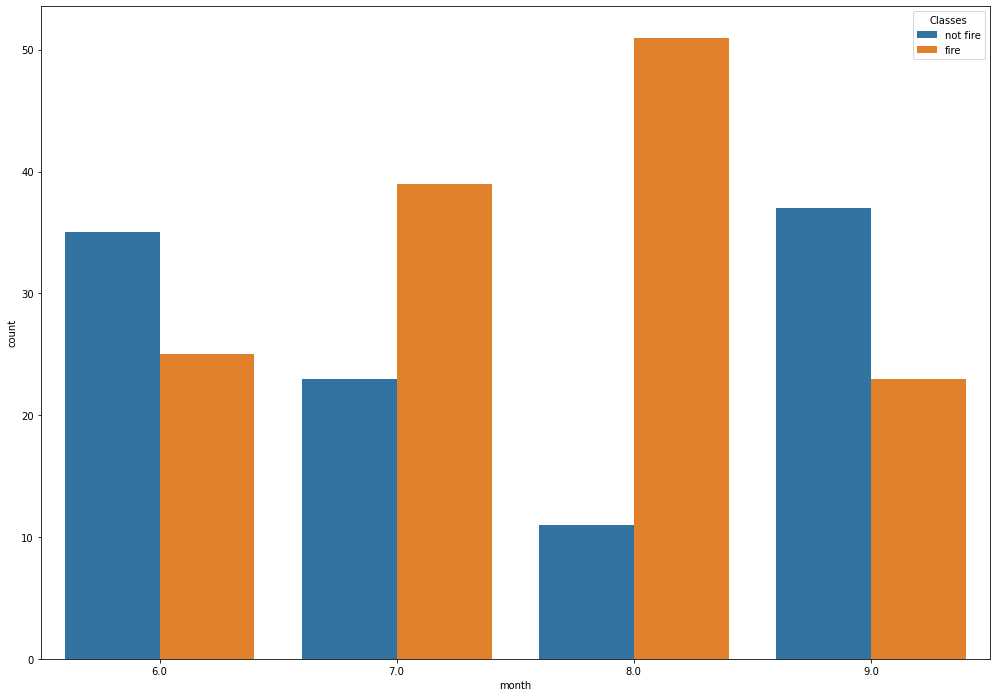

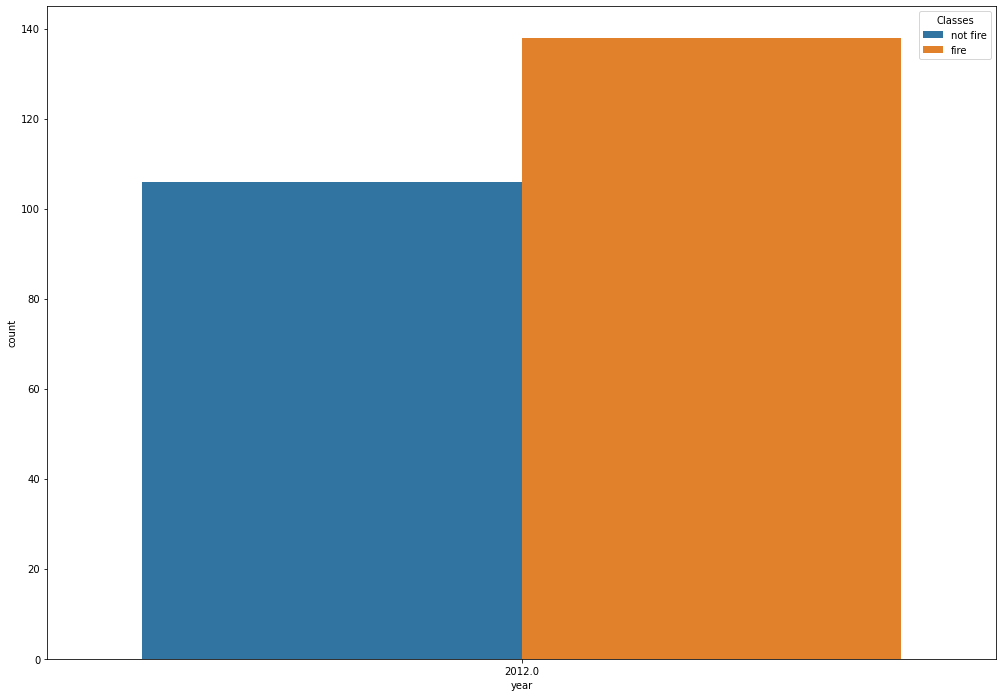

In [166]:
# above we can see discrete features are day, month, year and region. So, we will try to see on which day, month and year there were fires in which regions.
discrete_features =['day','month','year']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(17, 12))
    sns.countplot(data= data_updated, x = fea, hue = "Classes",ax=ax)
    plt.show()

##### Inference: 
>- Day: During the initial days of the month there are very less fire and it rises with the day in the month. Second half of the month sees more fire.
>- Month: Fire is there only in the month of June, July, August and September. But overall the month of July and August sees more fire than rest two.
>- Year: Only 2012 data is there which has more fire according to the given data.

#### We can also see by region, in what day or month there was more fire in one region


##### For Bejaia region

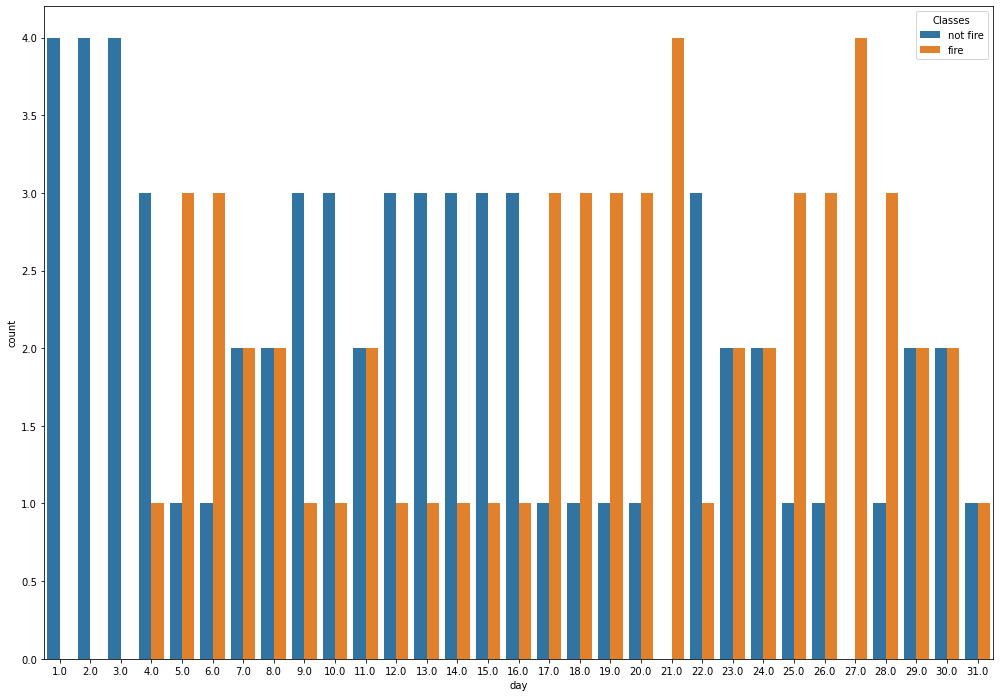

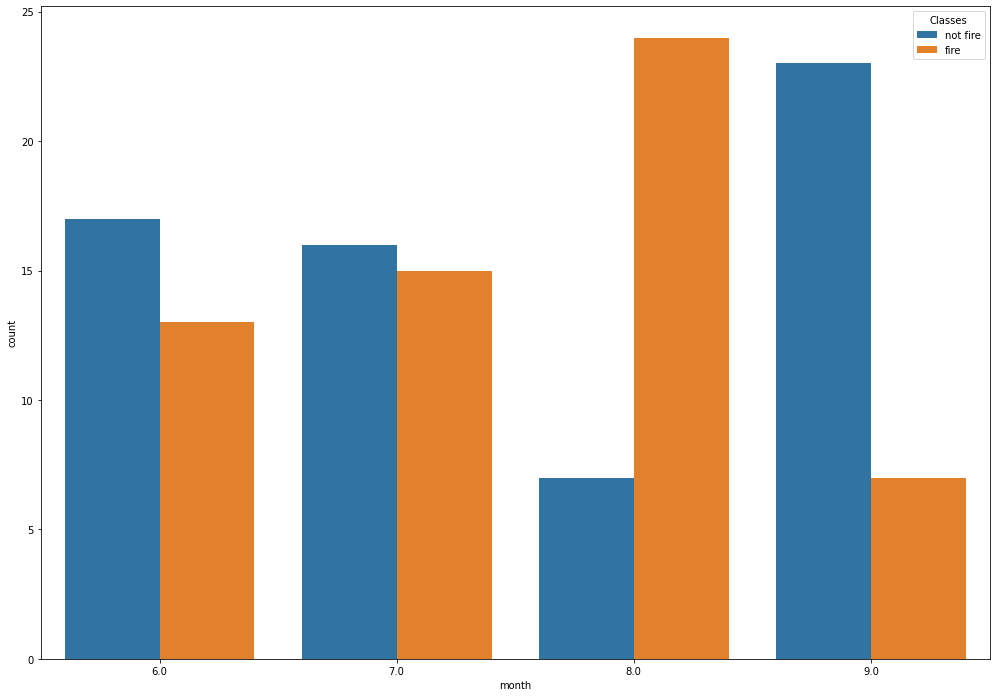

In [168]:
discrete_features =['day','month']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(17, 12))
    sns.countplot(data= data_updated[:122], x = fea, hue = "Classes",ax=ax)
    plt.show()

##### Inference: 
>- Day: Just like the overall data we can see there are more fire in the second half of the month.
>- Month: While compairing number of fire with number of no fire, month of August sees more fire in  the Bejaia region. Which is in line with the conclusion drawn from overall data.

##### For Sidi-Bel Abbes region

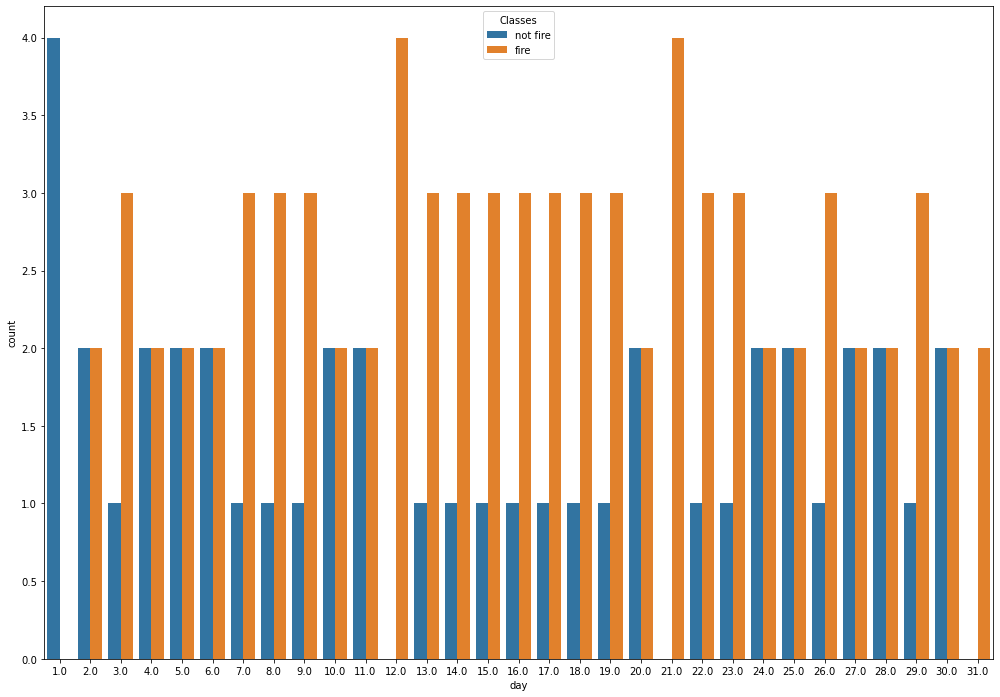

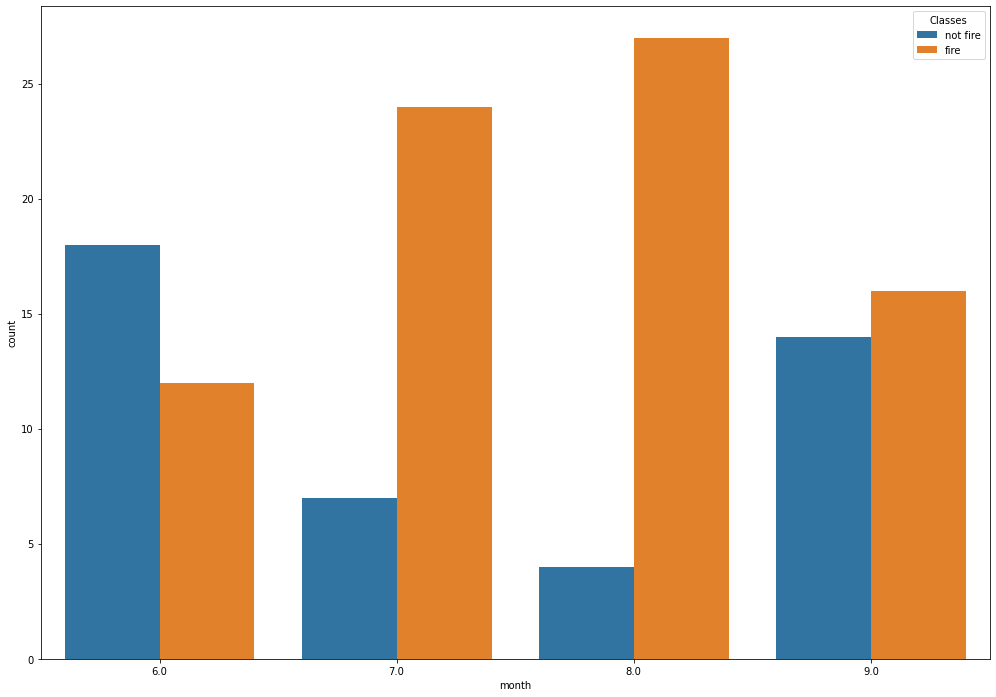

In [169]:
discrete_features =['day','month']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(17, 12))
    sns.countplot(data= data_updated[122:245], x = fea, hue = "Classes",ax=ax)
    plt.show()

##### Inference: 
>- Day: As it was expected from previous conclusion (Sidi-Bel Abbes sees more forest fire), we can see almost all the days sees more fire than no fire.
>- Month: While compairing number of fire with number of no fire, except month of June all months sees more fire than otherwise.

#### We can also see how other features play with fire which can help us make a conclusion regarding the reason of forest fire 

In [170]:
data_updated.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

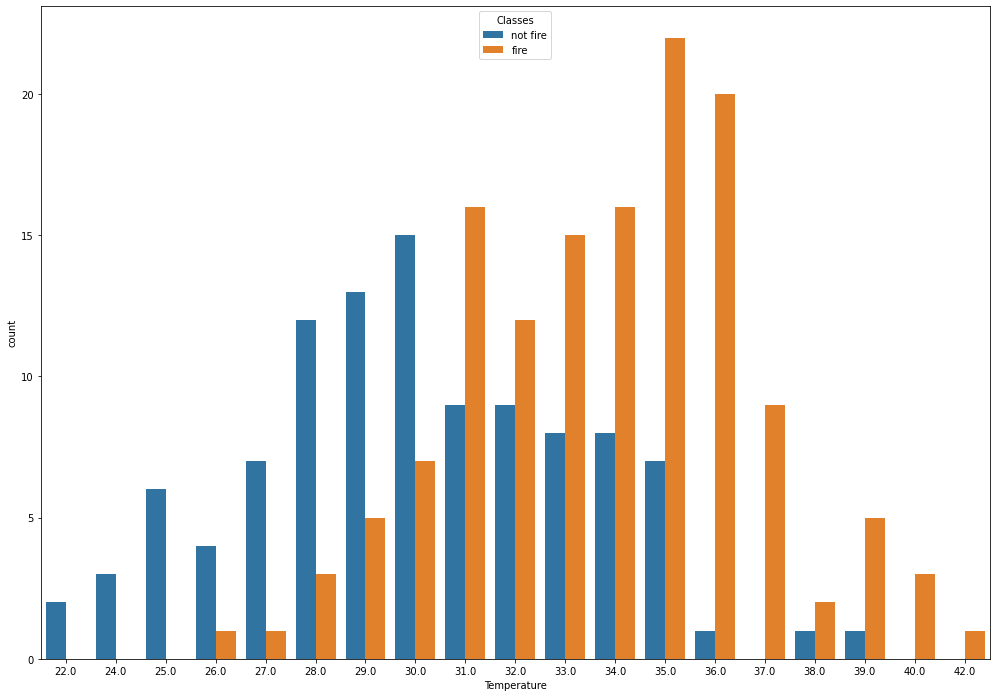

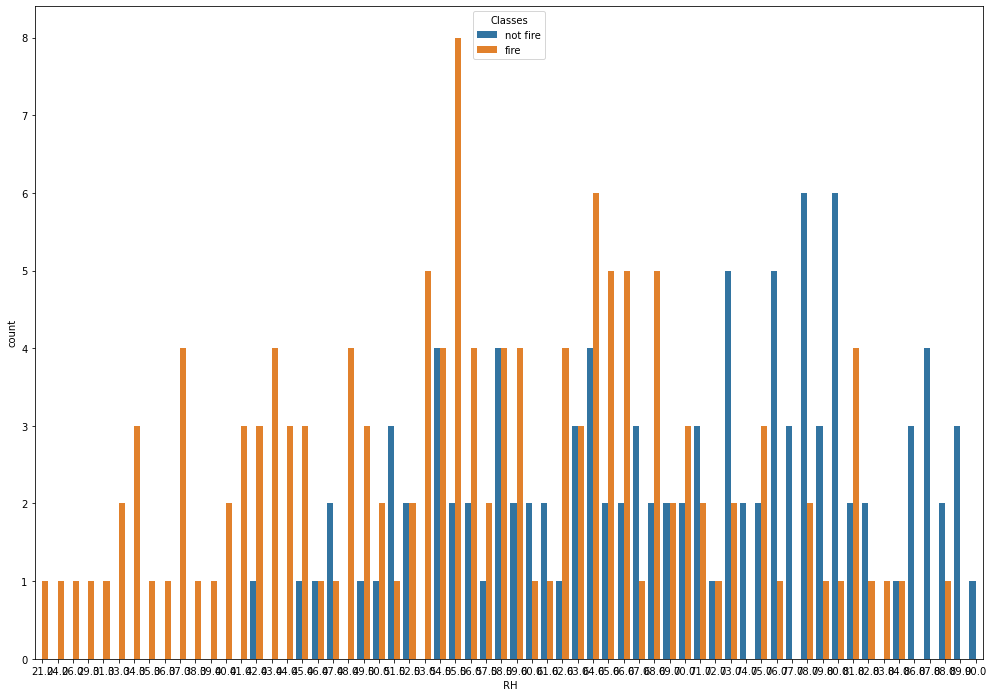

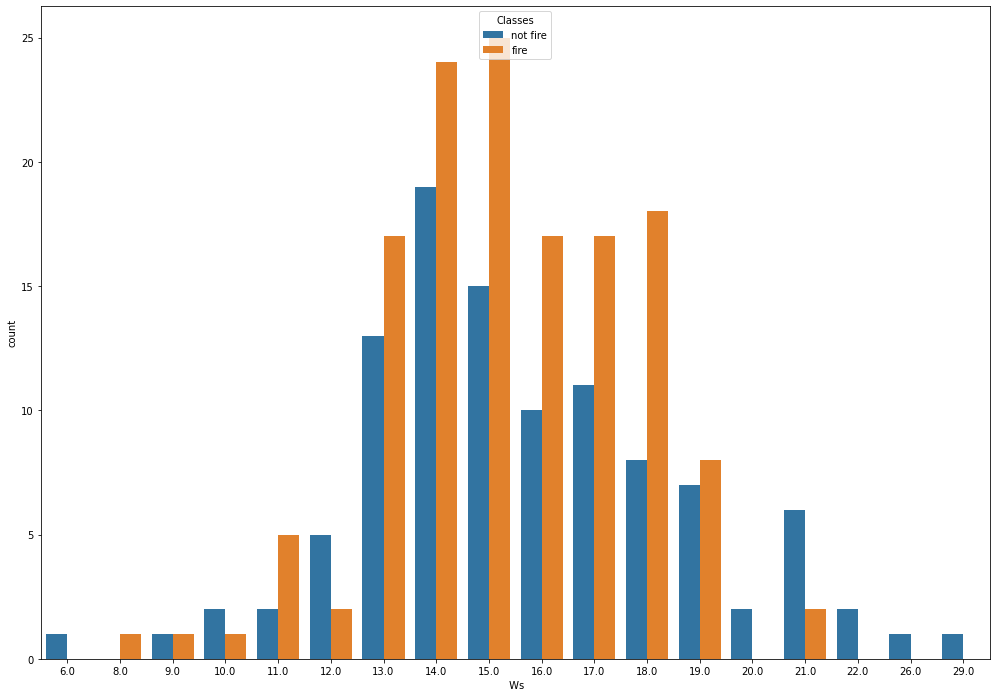

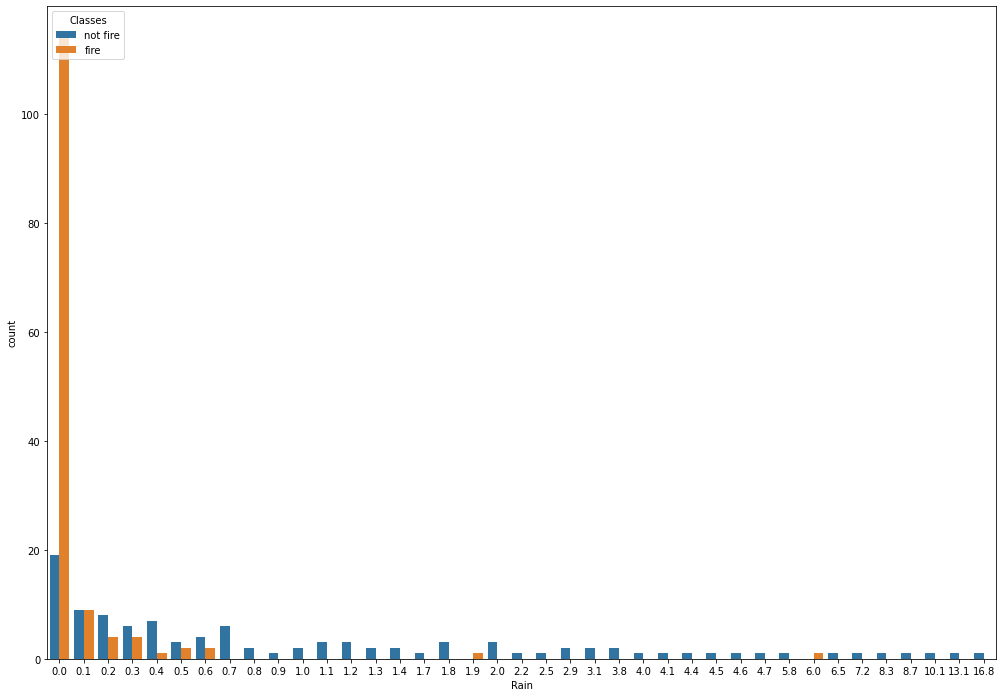

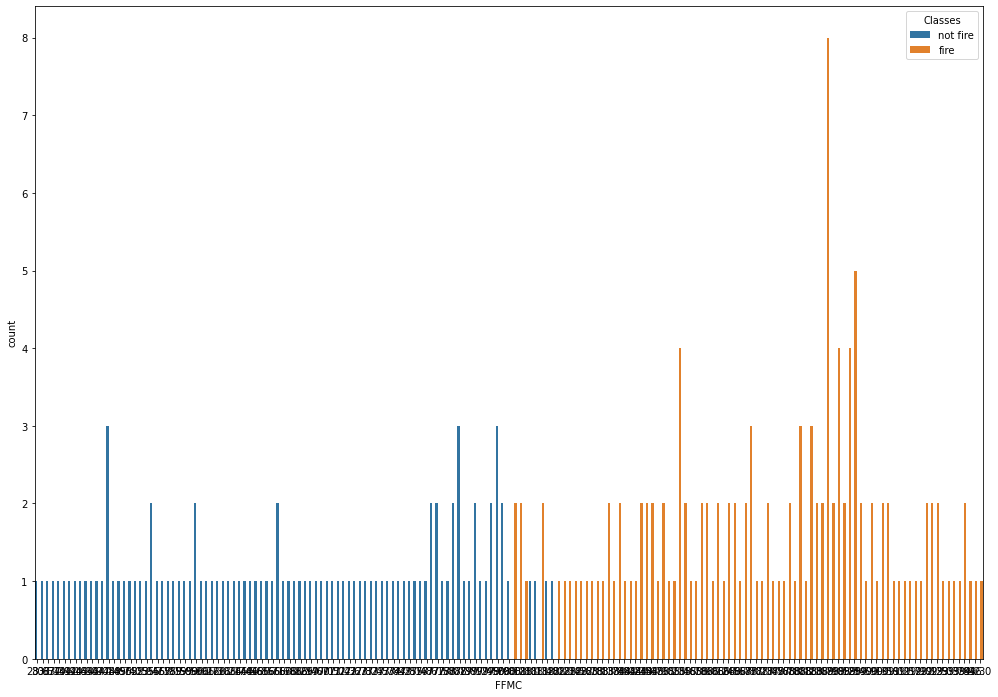

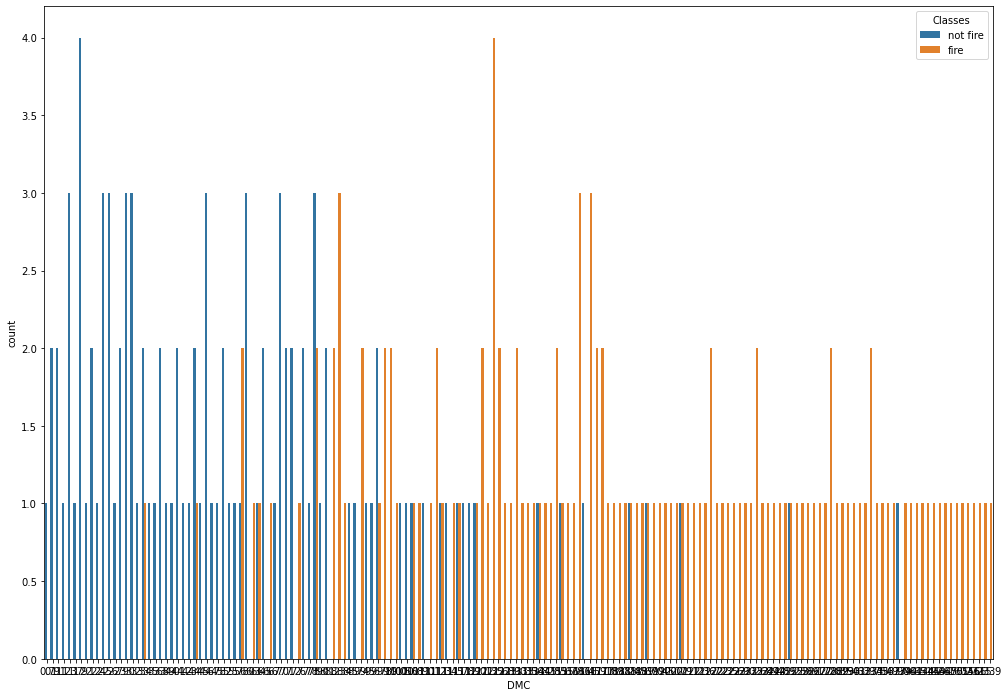

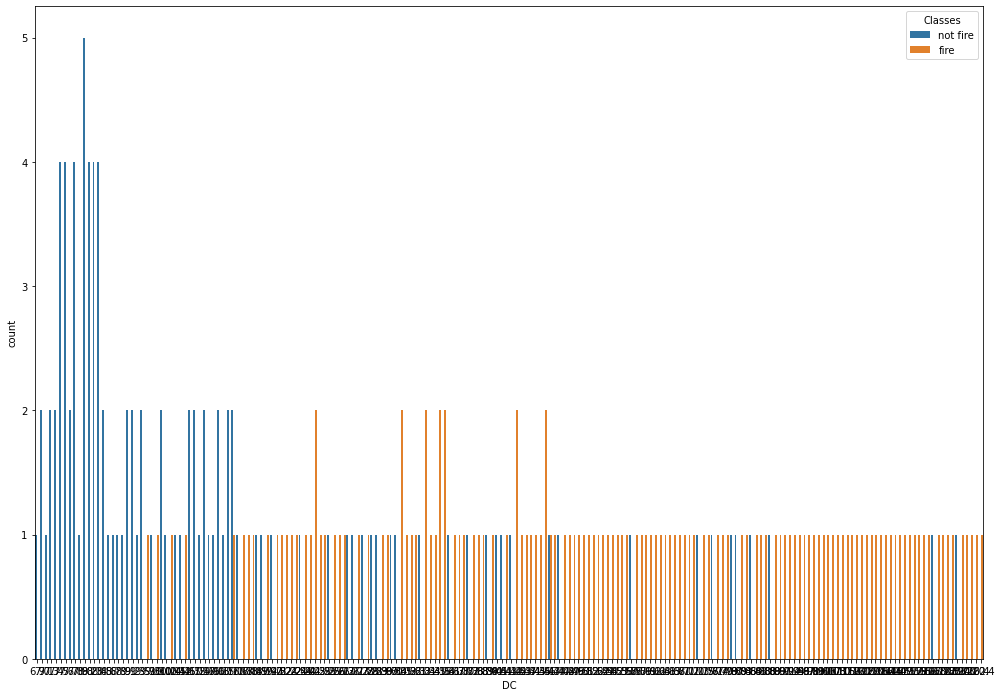

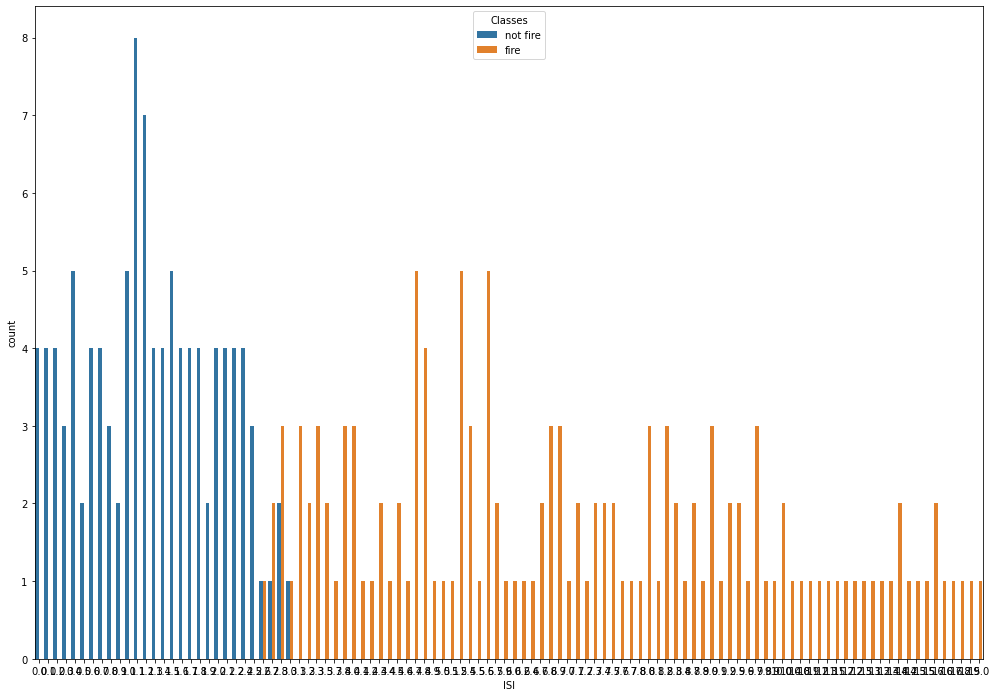

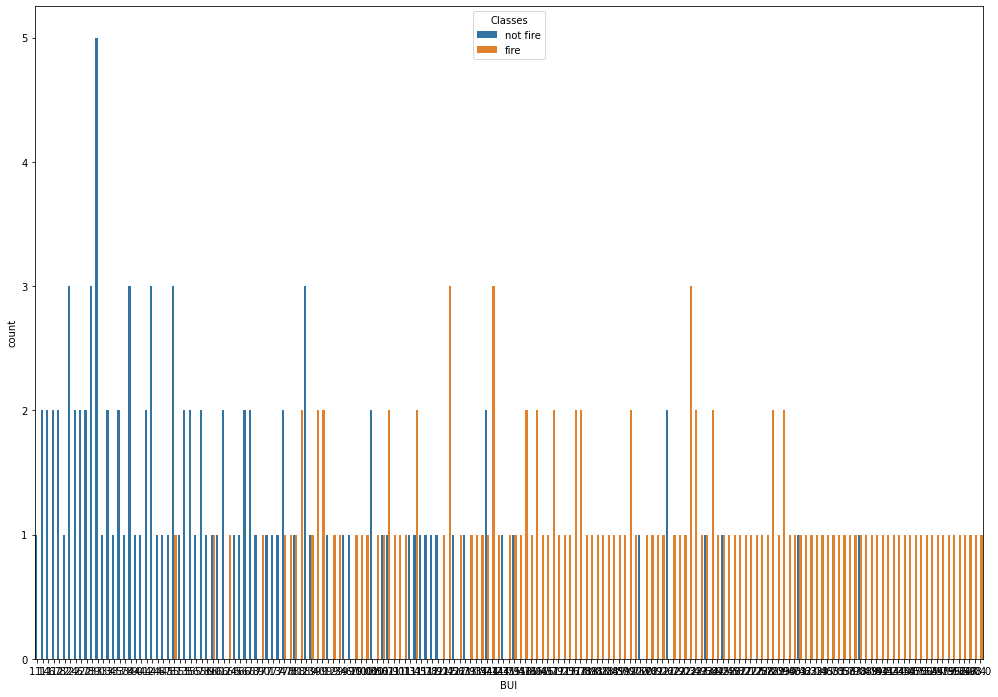

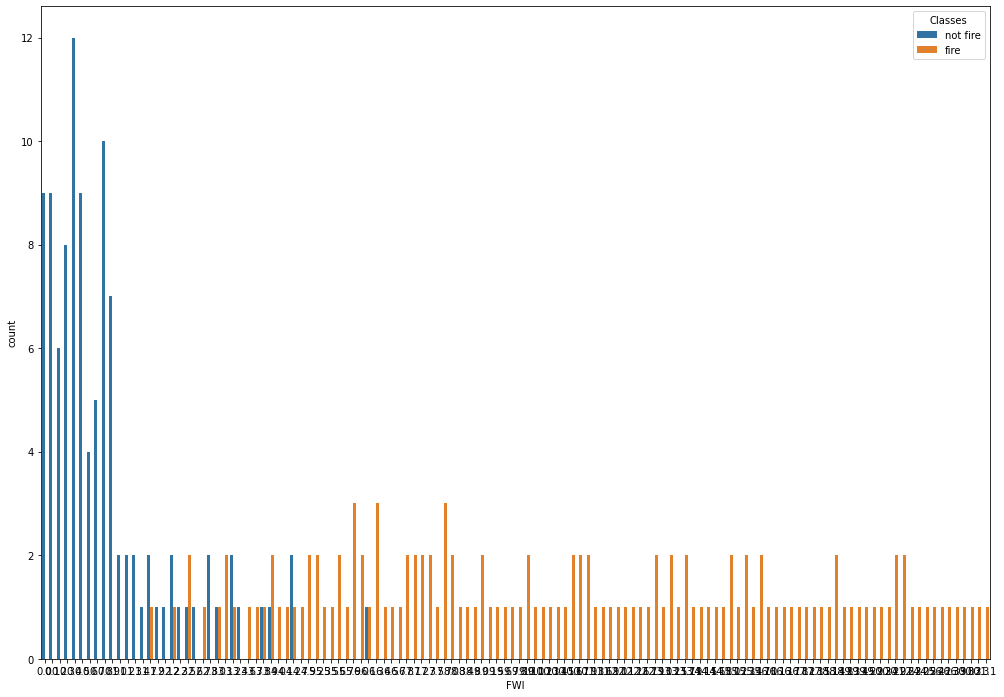

In [171]:
discrete_features =['Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(17, 12))
    sns.countplot(data= data_updated, x = fea, hue = "Classes",ax=ax)
    plt.show()

#### Inference:
>- Temperature: If the temperature increases above 31 degC the likelihood of fire increases.
>- RH: If the relative humidity is below 70 then there are more chances of fire, which is expected as there would be less moisture in the temperature and any friction can cause spark leading to fire.
>- Ws: Wind speed is a normal distribution as with lower wind speed there are less chances of friction between trees for fire to take place and high wind speed will cool the fire down as soon as it starts the spark. So, an optimum amount of wind speed is required in order to start forest fire, which in this case is between 13-19.
>- Rain: The lesser the rain more would be the chances of fire. We can further analyse rain on a particular day with fire.
>- FFMC: As this parameter describes the ignition probability, fire happened only on its higher side. Which meant there was higher probability of fire and it happended.
>- DMC: High consumption of fuel where there is moisture in moderate duff layers and medium size woody material
>- ISI: If the initial spread is less there would be very less chances of prolonged fire or if the initial spread from spark is less or no then there would be no fire.
>- BUI: Build up index is higher means more fire 

### Distribution of continuous numerical features

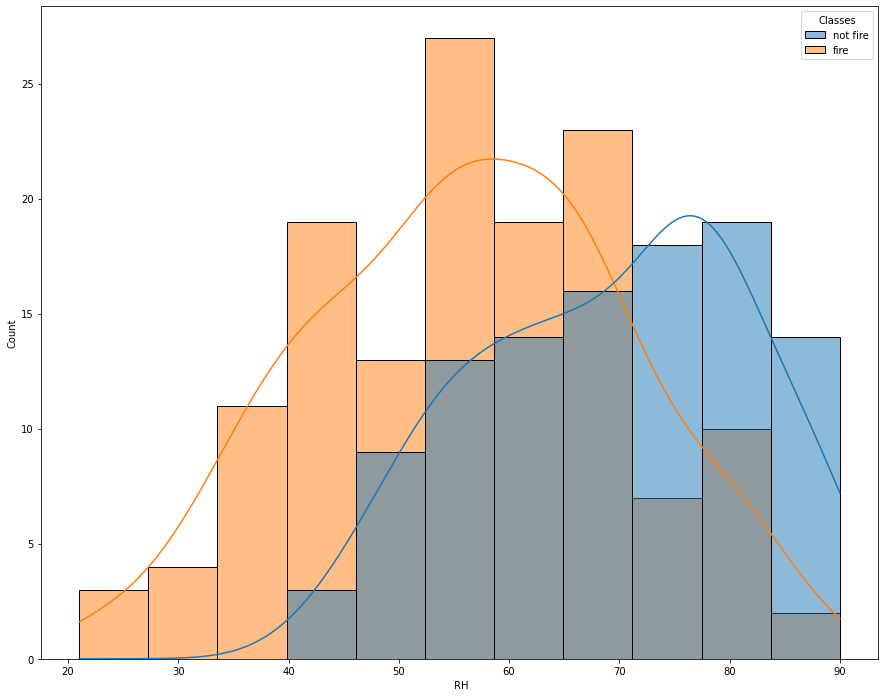

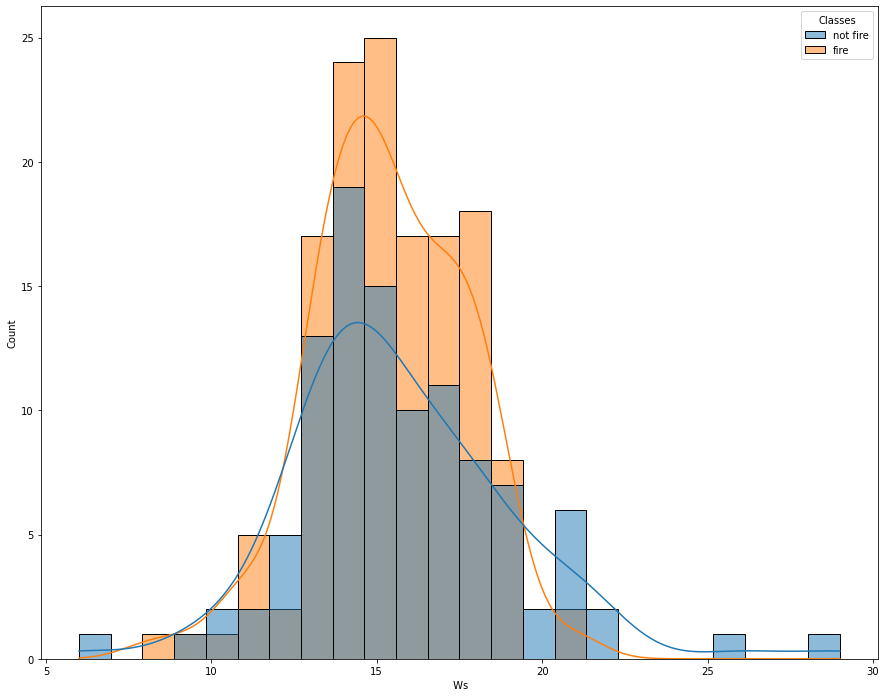

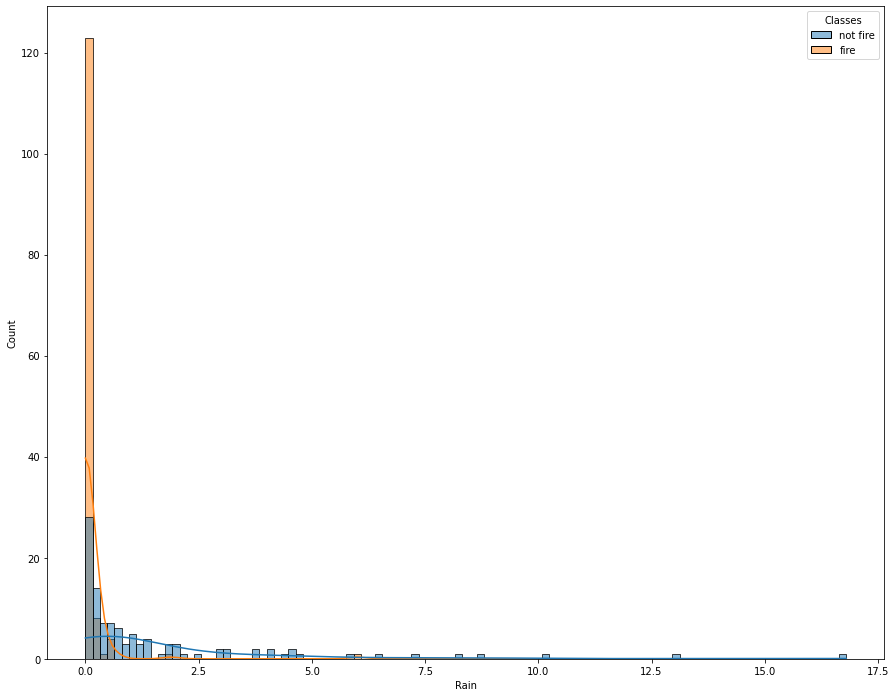

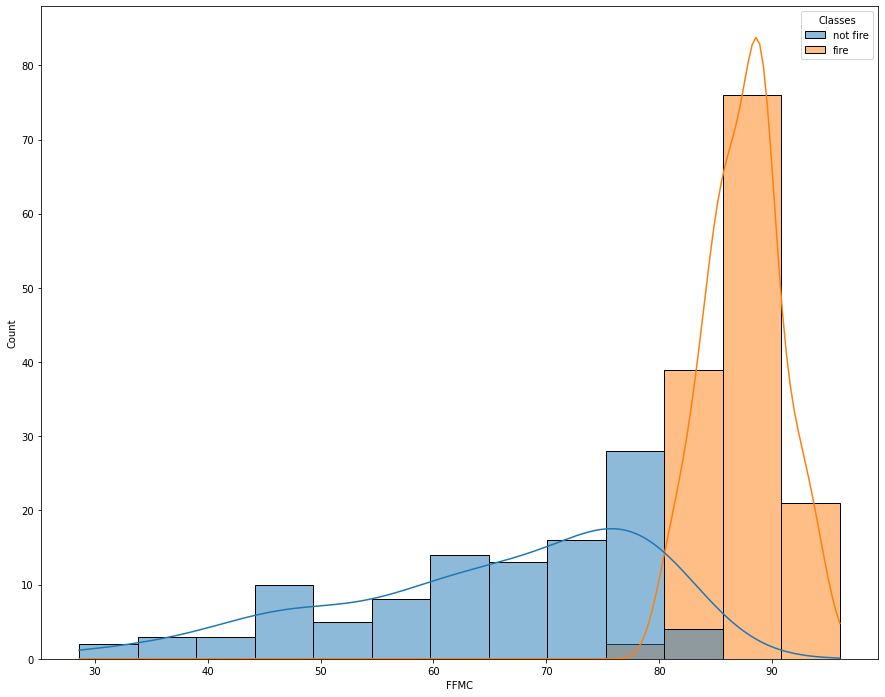

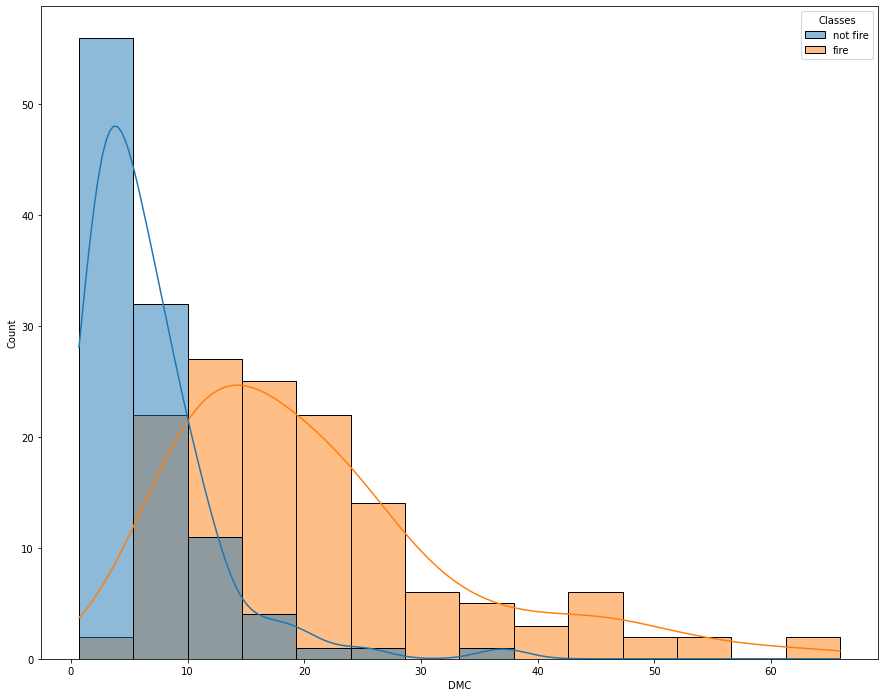

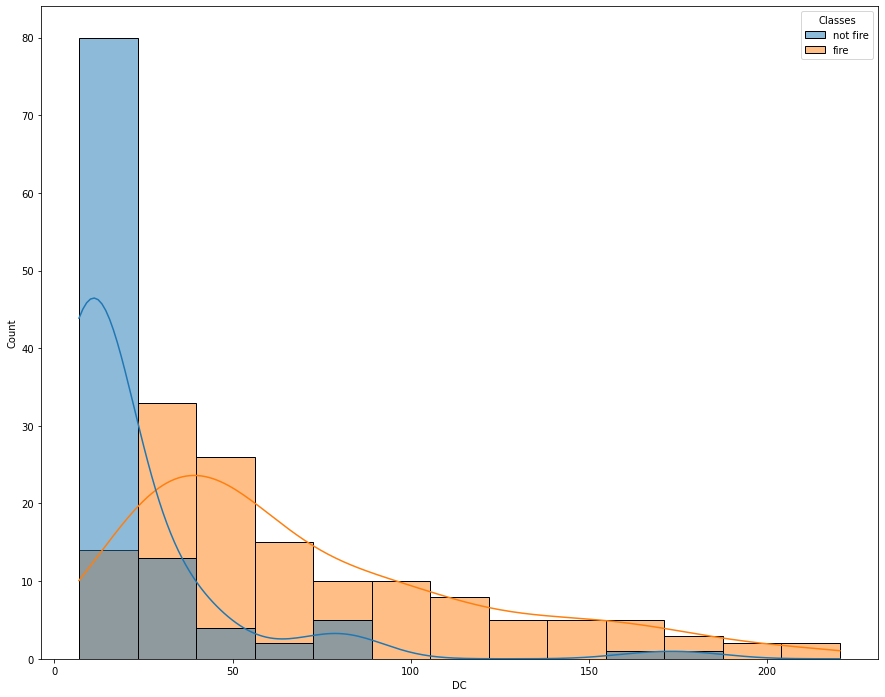

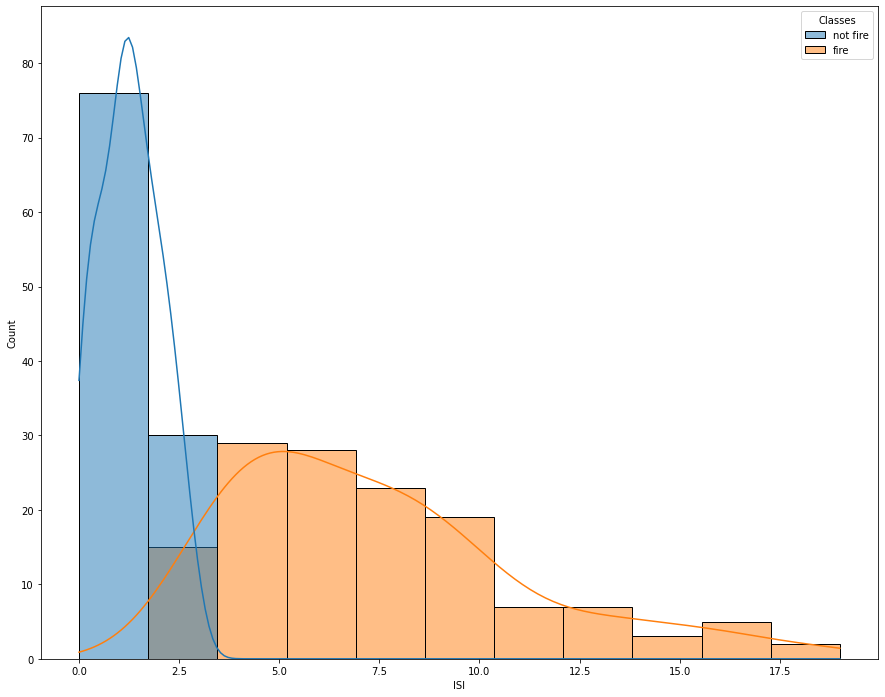

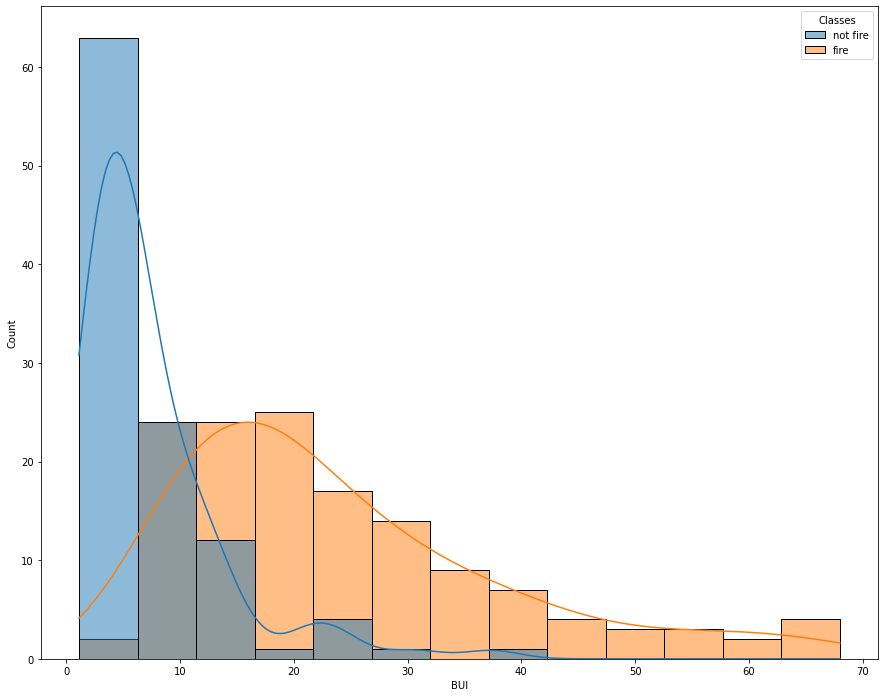

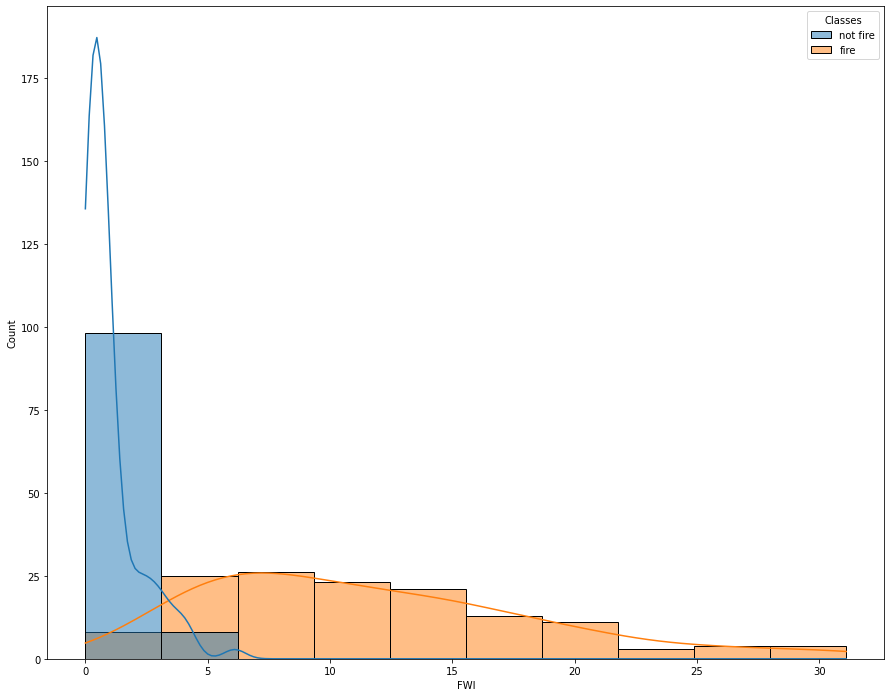

In [175]:
continuous_features =[' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.histplot(data= data_updated, x = fea, hue = "Classes",ax=ax, kde= True)
    plt.show()

### Checking for Outliers

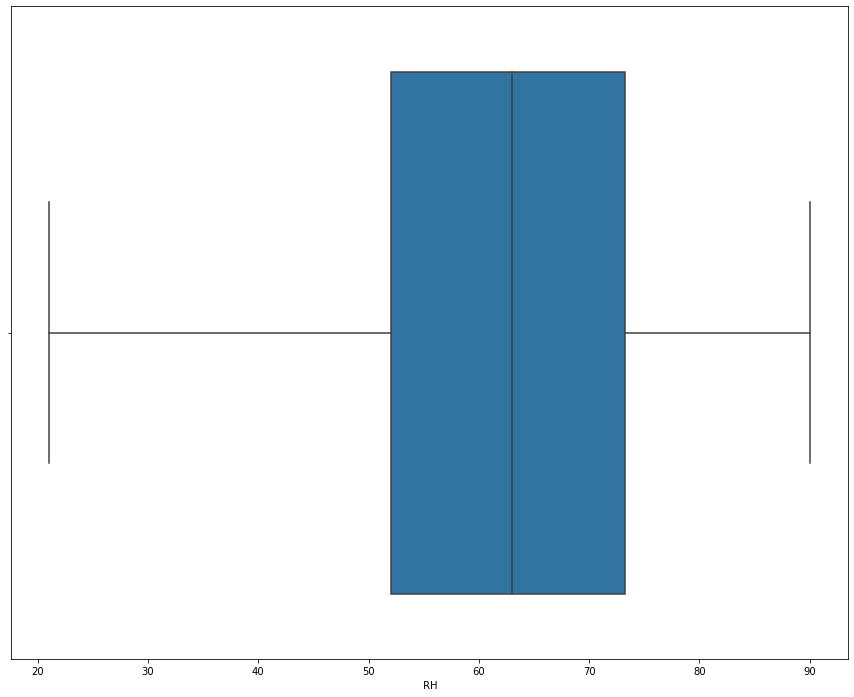

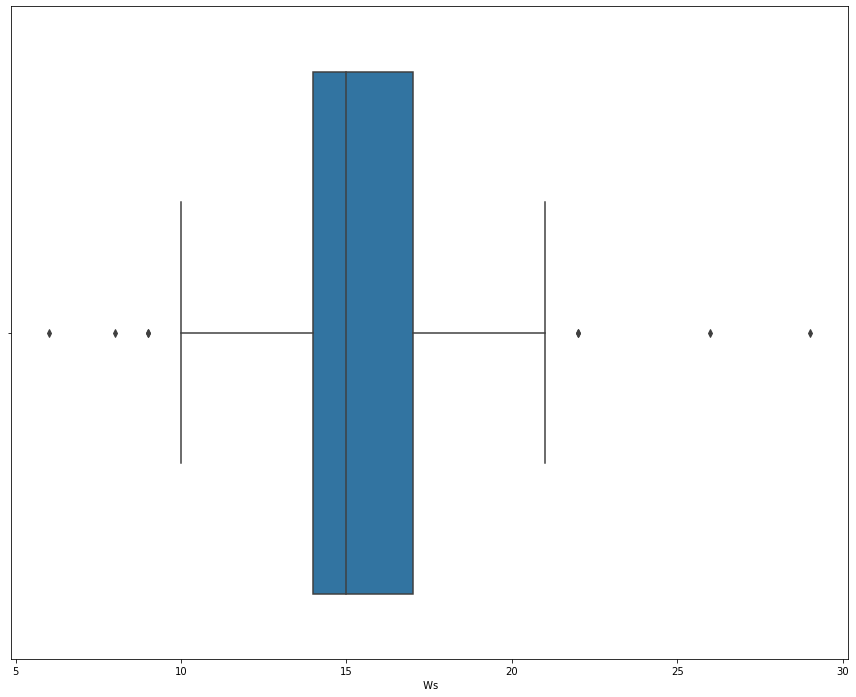

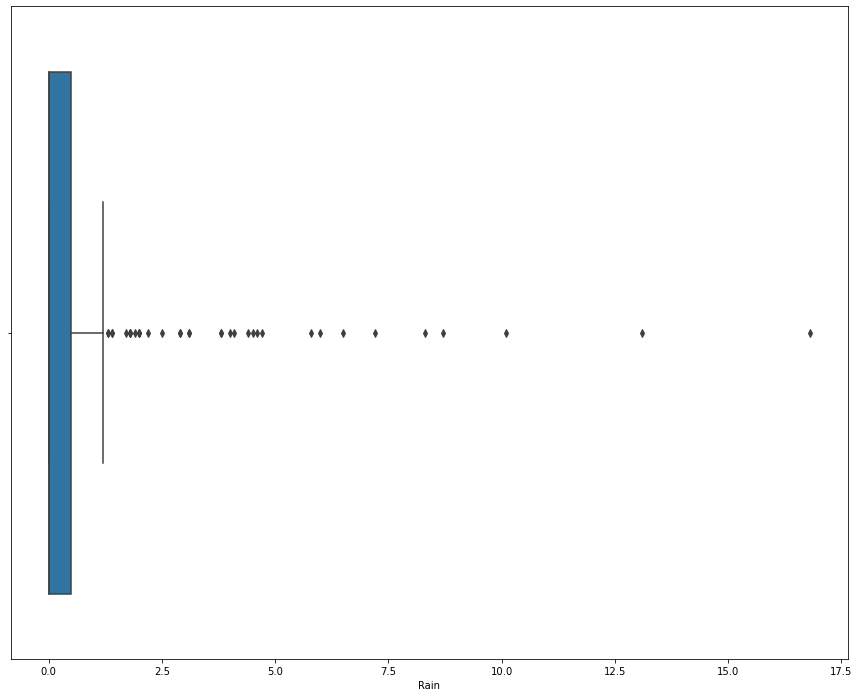

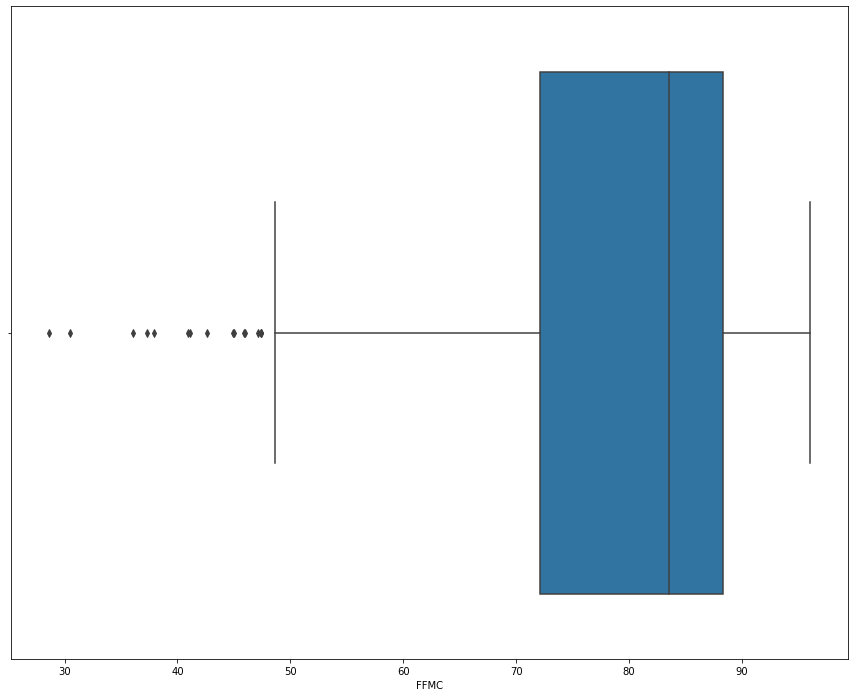

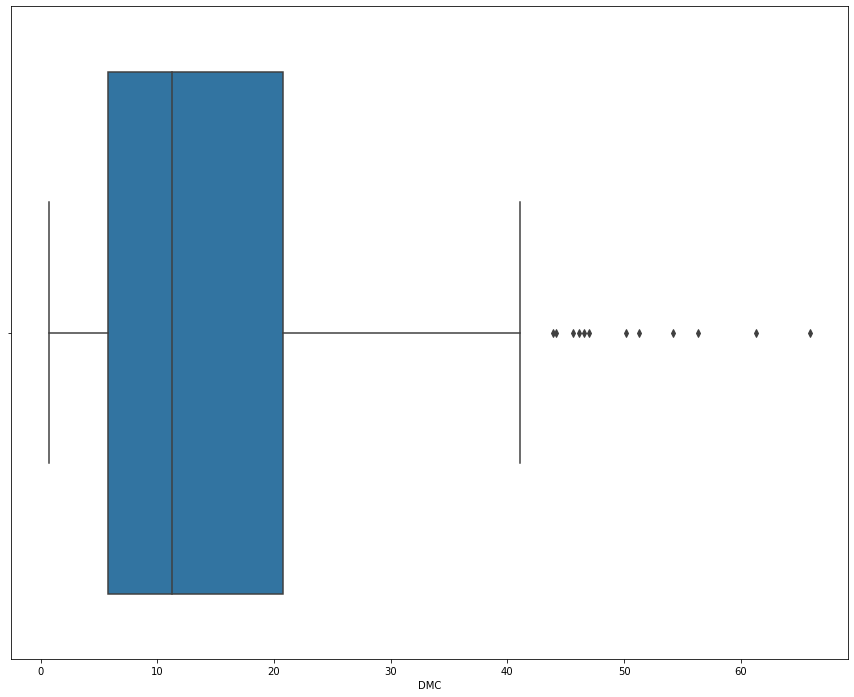

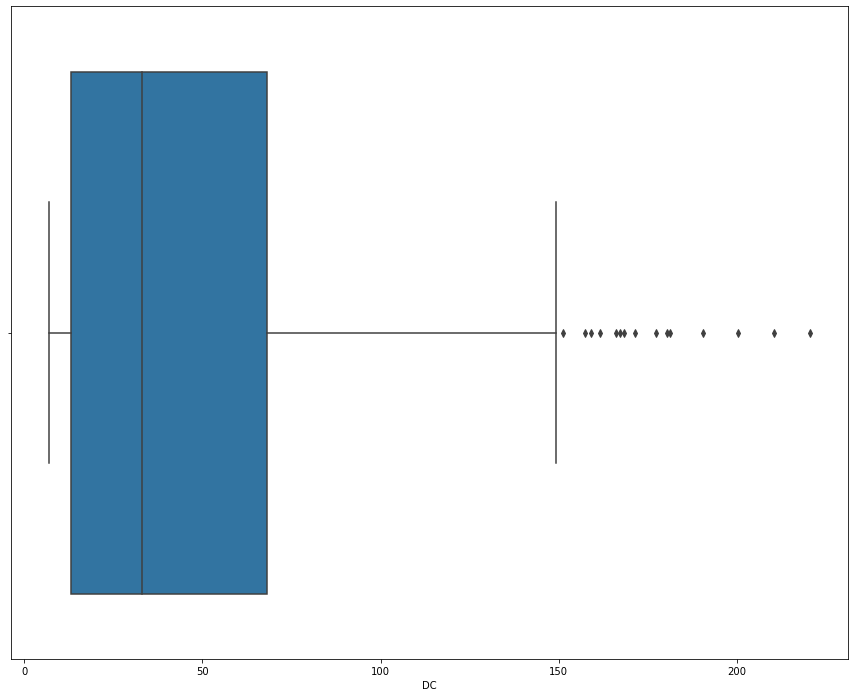

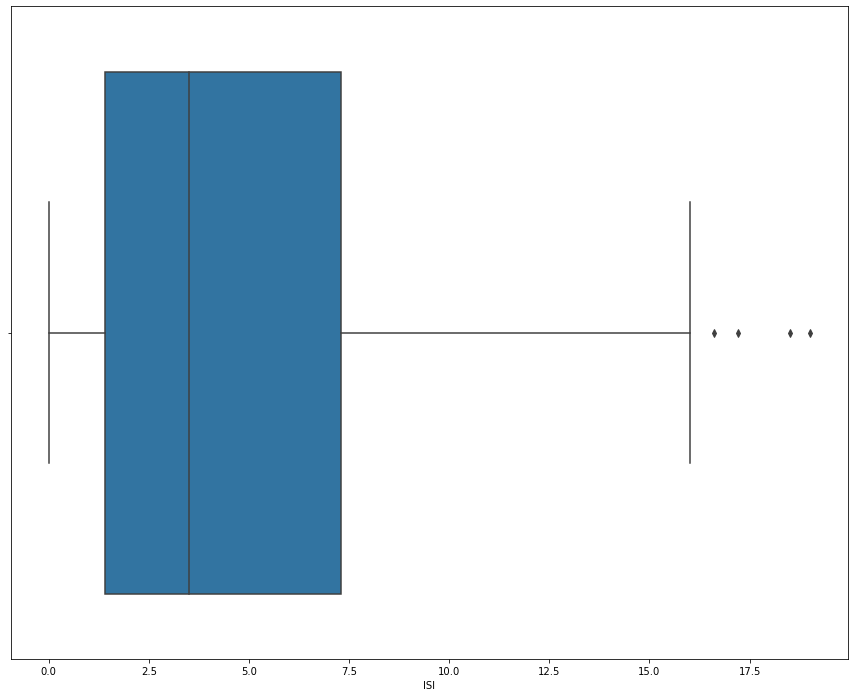

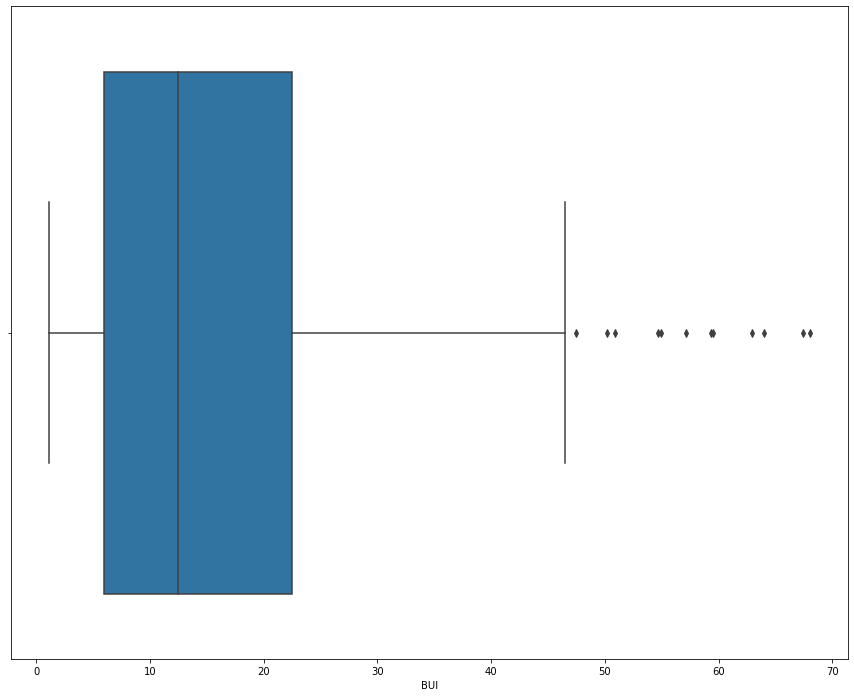

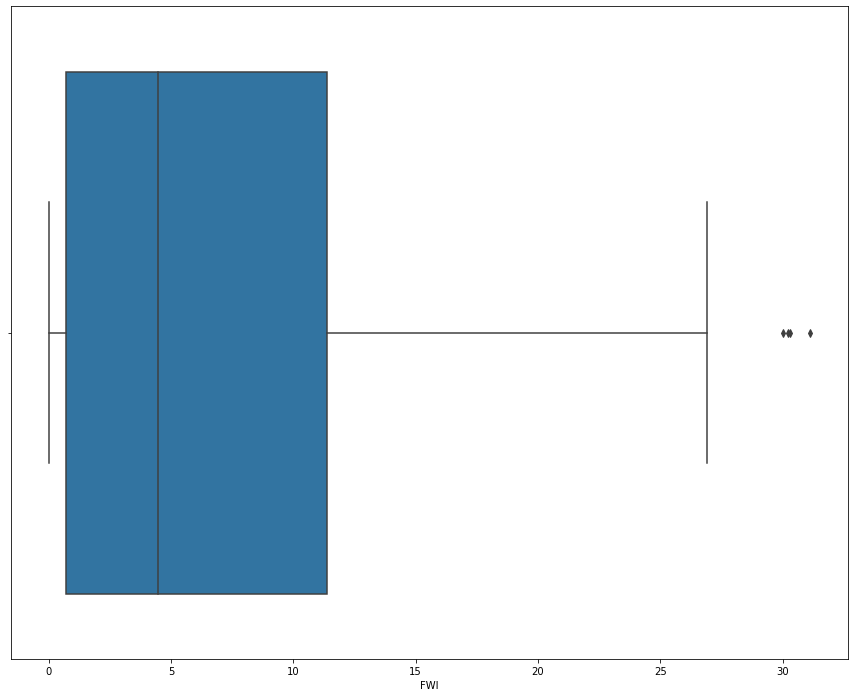

In [178]:
continuous_features =[' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for fea in discrete_features:
    fig, ax = plt.subplots(figsize=(15, 12))
    sns.boxplot(data= data_updated, x = fea,ax=ax)
    plt.show()

### Checking for the correlation 

C:\Users\Swastic\AppData\Local\Temp/ipykernel_17968/2178903994.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_updated.columns)
C:\Users\Swastic\AppData\Local\Temp/ipykernel_17968/2178903994.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(data_updated.columns)


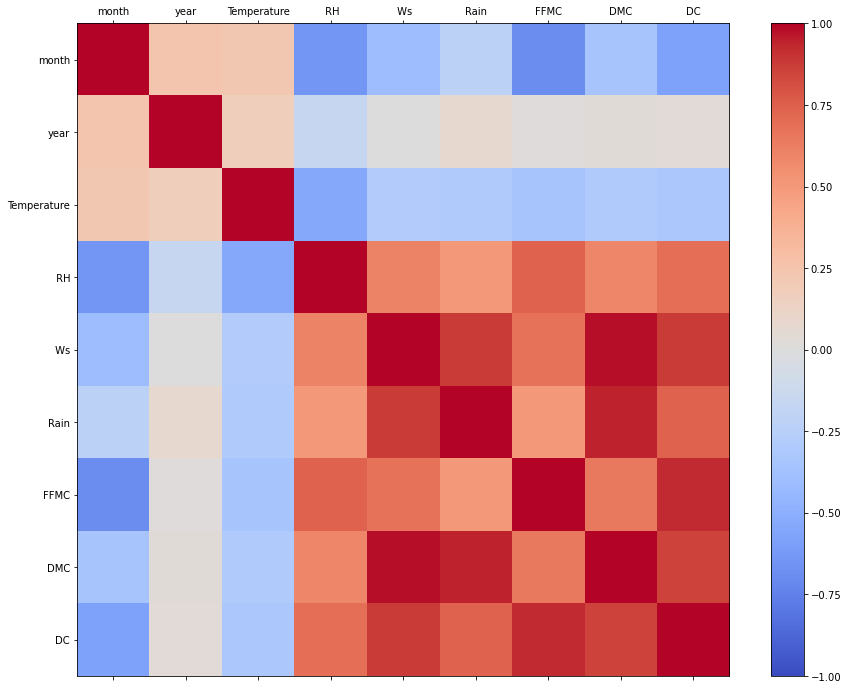

In [183]:
continuous_features =[' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']
data_continuous=data_updated[continuous_features]

corr = data_continuous.corr()
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ax.set_xticklabels(data_updated.columns)
ax.set_yticklabels(data_updated.columns)
plt.show()